Problem Definition:

In this mini-project, our work will be to evaluate which attributes influence a user when purchasing products online and build a predictive model to make predictions about future purchases.

We will use the dataset as a data source:

Online Shoppers' Purchasing Intention Dataset

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The dataset consists of vectors of resources belonging to 12,330 online sessions. The dataset was formed so that each session belongs to a different user over a 1-year period to avoid any bias towards a specific campaign, special day, user, profile, or period.

The dataset consists of 10 numeric and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

In [87]:
# Libraries
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm


In [2]:
# Loading the data
df = pd.read_csv('dados/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Data dictionary

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in this session and the total time spent in each one of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when the user performs an action, for example, moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page on the ecommerce site.

The value of a webpage's "Bounce Rate" feature refers to the percentage of visitors who enter the site from that page and leave ("Bounce") without triggering further requests to the server during that session.

The value of the "Exit Rate" feature for a specific web page is calculated as the percentage that was last in the session for all page-by-page views.

The "Page Value" feature represents the average value of a web page that a user visits before completing an e-commerce transaction.

The "Special Day" feature indicates how close your website visit time is to a specific special day (e.g., Mother's Day, Valentine's Day) on which sessions are most likely to end with a transaction. The value of this attribute is determined by considering e-commerce dynamics, such as the duration between order date and delivery date. For example, on Valentine's Day, this value assumes a non-zero value between February 2nd and February 12th (Valentine's Day in the US and Europe), zero before and after that date, unless it's close to another special day, and a maximum value of 1 on February 8th.

The dataset also includes operating system type, browser, region, traffic type, visitor type such as new or recurring visitor, and a Boolean value indicating whether the visit date is a weekend and the month of the year.

The target variable (Revenue) is Boolean, with True if the session generated revenue and False if not.

# Data Cleaning

In [4]:
# Verifying null values
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [5]:
df.isnull().sum()/len(df)

Administrative             0.001135
Administrative_Duration    0.001135
Informational              0.001135
Informational_Duration     0.001135
ProductRelated             0.001135
ProductRelated_Duration    0.001135
BounceRates                0.001135
ExitRates                  0.001135
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

Removing null values will not harm the model due to the percentage of them is tiny

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Exploratory Analysis

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
# Verifying unique values:
df.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

We have 12316 rows and in some columns we have only 27 unique values. We shall treat them as categorical values.

In [11]:
df2 = df.copy()
continuos = []
categorical = []
for i in df2.columns[:-1]: # We want to exclude revenue
    if df2[i].nunique() >= 30:
        continuos.append(i)
    else:
        categorical.append(i)

In [12]:
continuos

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [13]:
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [14]:
df2[continuos].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [15]:
df2[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [16]:
## Exploring Continuos

In [17]:
df2[continuos].describe()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,80.906176,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952
std,176.860432,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926
min,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000
50%,8.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000
75%,93.500000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000
max,3398.750000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


<AxesSubplot:>

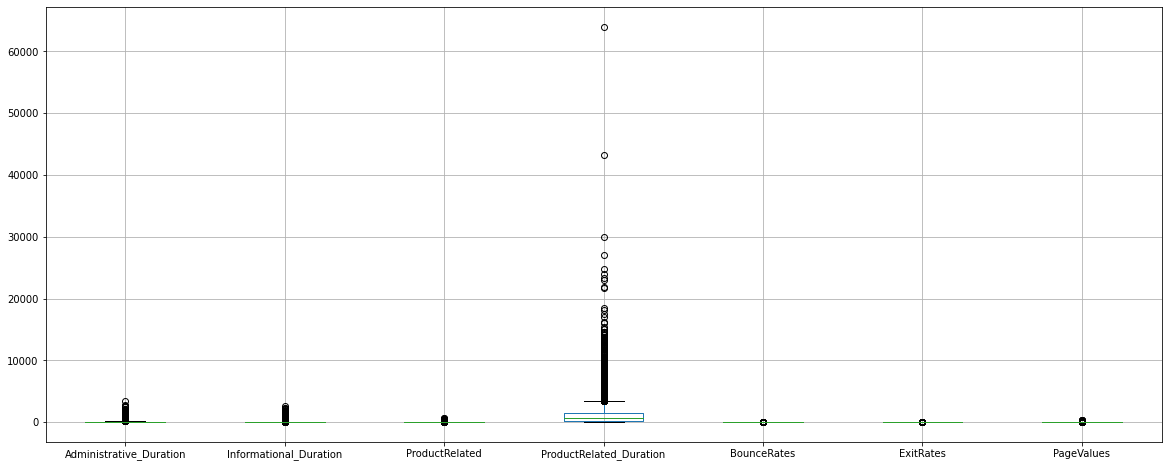

In [18]:
# Let's check if there is outliers.
plt.figure(figsize=(20,8))
df2[continuos].boxplot()

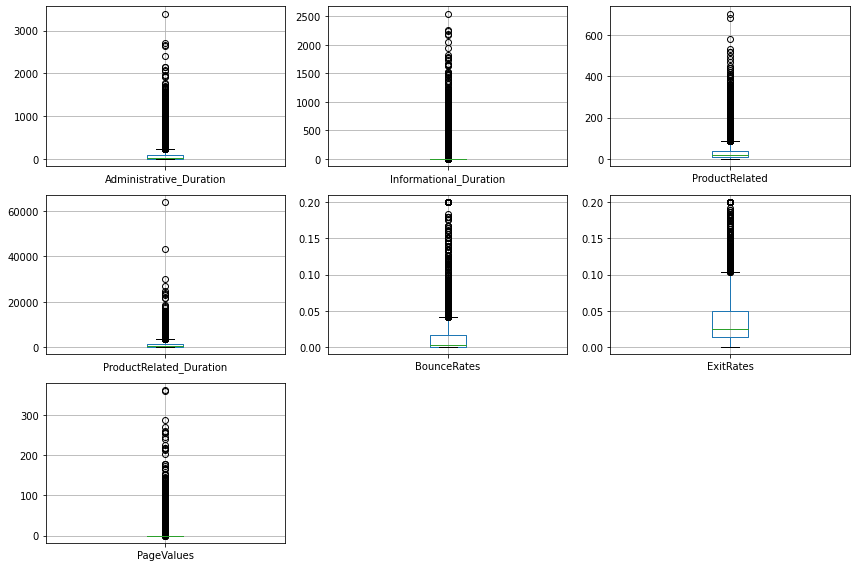

In [19]:
## Quite different in range... Let's get them separated
plt.figure(figsize=(12,8))
for i,col in enumerate(continuos):
    plt.subplot(3,3,i+1) # nrows, ncols, index
    df2.boxplot(col)
    plt.tight_layout()

In [20]:
## We can see many outliers in the dataset. They must be removed (Preprocessing section)

In [21]:
## Now we shall see correlation between them

<AxesSubplot:>

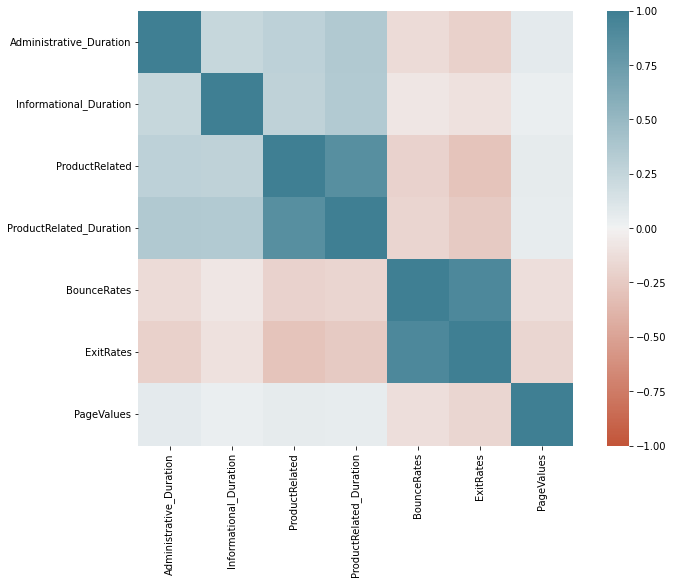

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df2[continuos].corr(), vmin = -1, vmax = 1, square = True, cmap = sns.diverging_palette(20,220, n = 400))

In [23]:
df2[continuos].corr()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Administrative_Duration,1.000000,0.237959,0.288869,0.355238,-0.144128,-0.205618,0.067463
Informational_Duration,0.237959,1.000000,0.279966,0.347300,-0.074077,-0.105205,0.030787
ProductRelated,0.288869,0.279966,1.000000,0.860868,-0.204469,-0.292219,0.056067
ProductRelated_Duration,0.355238,0.347300,0.860868,1.000000,-0.184409,-0.251645,0.052623
BounceRates,-0.144128,-0.074077,-0.204469,-0.184409,1.000000,0.913436,-0.119357
ExitRates,-0.205618,-0.105205,-0.292219,-0.251645,0.913436,1.000000,-0.174397
PageValues,0.067463,0.030787,0.056067,0.052623,-0.119357,-0.174397,1.000000


In [24]:
# We also see strong positive correlations between predictors variables. It's required a feature selection

In [25]:
# Now we explore the categorical dataset.

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


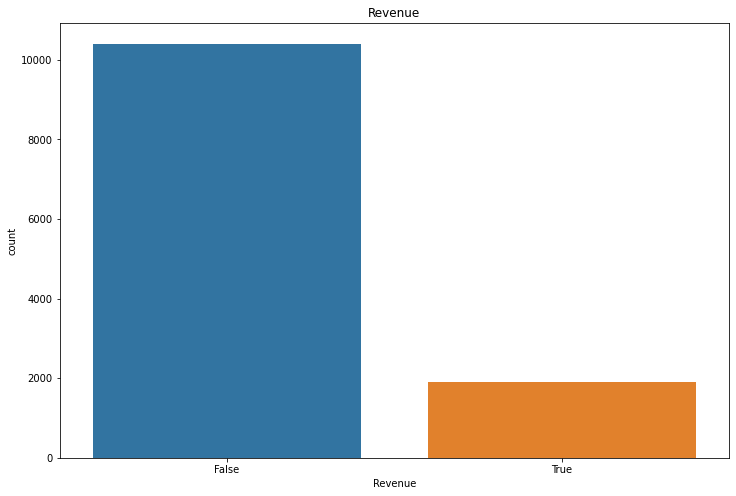

In [104]:
plt.figure(figsize=(12,8))
plt.title('Revenue')
sns.countplot(df2['Revenue'])
plt.savefig('03.png')

In [27]:
## Very unbalanced dataset, which means, we need to do an oversampling. (Preprocessing sections)

<AxesSubplot:xlabel='VisitorType'>

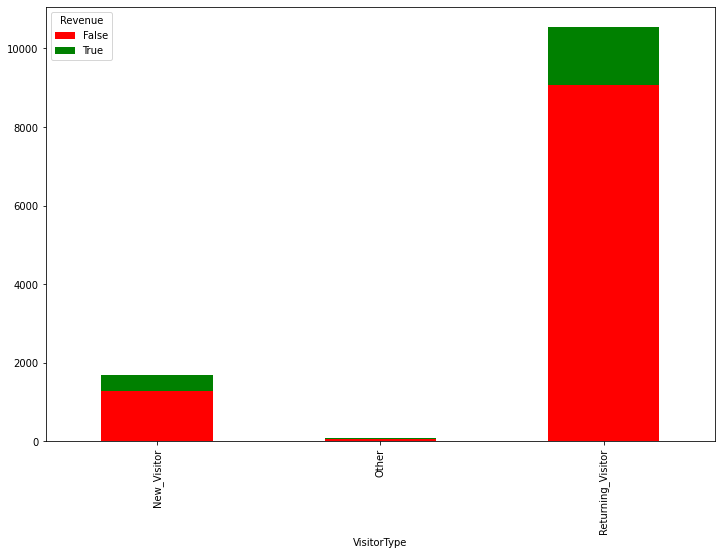

In [28]:
pd.crosstab(df2['VisitorType'], df['Revenue']).plot(kind = 'bar', stacked = True, figsize=(12,8), color = ['red','green'])

<AxesSubplot:xlabel='VisitorType'>

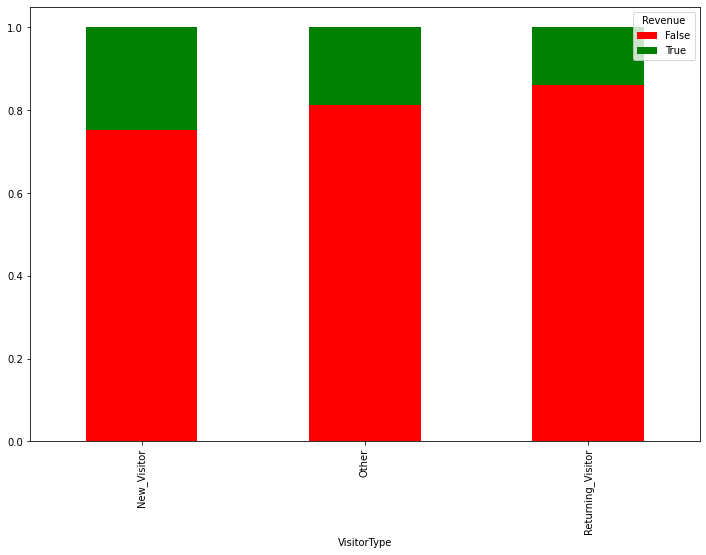

In [29]:
## Normalized
pd.crosstab(df2['VisitorType'], df['Revenue']).apply(lambda x: x/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, figsize=(12,8), color = ['red','green'])

In [30]:
## The proportion of those who buy is higher between new visitors!

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='VisitorType', ylabel='count'>

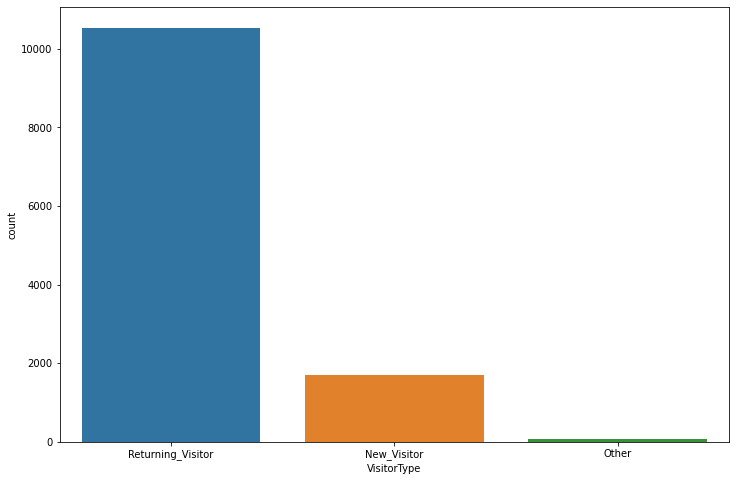

In [31]:
# Number of Visitors
plt.figure(figsize=(12,8))
sns.countplot(df2['VisitorType'])

<AxesSubplot:xlabel='Weekend'>

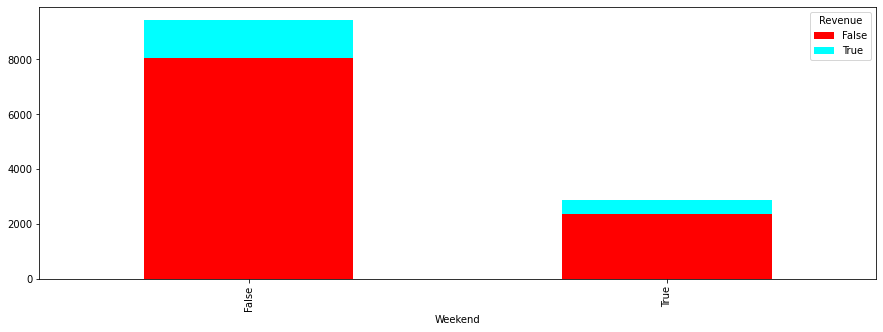

In [32]:
## Weekend vs Revenue
pd.crosstab(df2['Weekend'], df2['Revenue']).plot(kind = 'bar', stacked = True, figsize=(15,5), color = ['red', 'cyan'])

<AxesSubplot:xlabel='Weekend'>

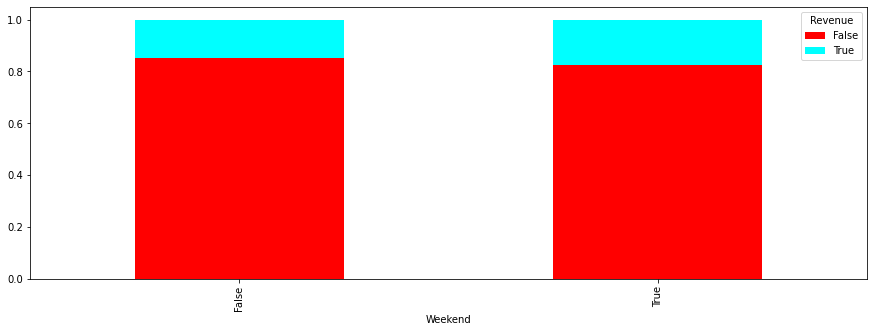

In [33]:
pd.crosstab(df2['Weekend'], df2['Revenue']).apply(lambda x: x/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, figsize=(15,5), color = ['red', 'cyan'])

The Visitors tend to buy more in the weekend than weekdays, despite of the number of purchases is higher in the weekdays.

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region', ylabel='count'>

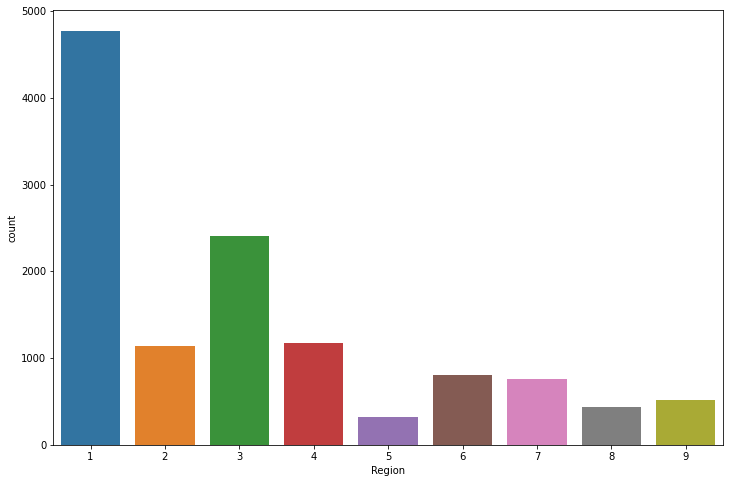

In [34]:
# Region
plt.figure(figsize= (12,8))
sns.countplot(df2['Region'])

<AxesSubplot:xlabel='Region'>

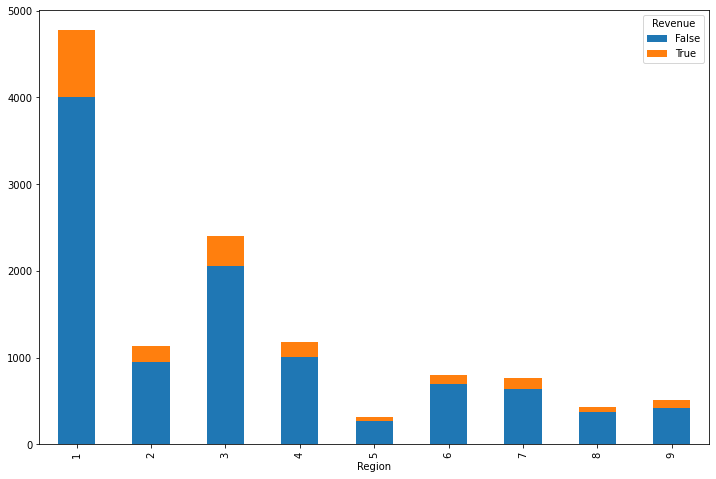

In [35]:
pd.crosstab(df2['Region'], df2['Revenue']).plot(kind = 'bar',  stacked = True, figsize = (12,8))

<AxesSubplot:xlabel='Region'>

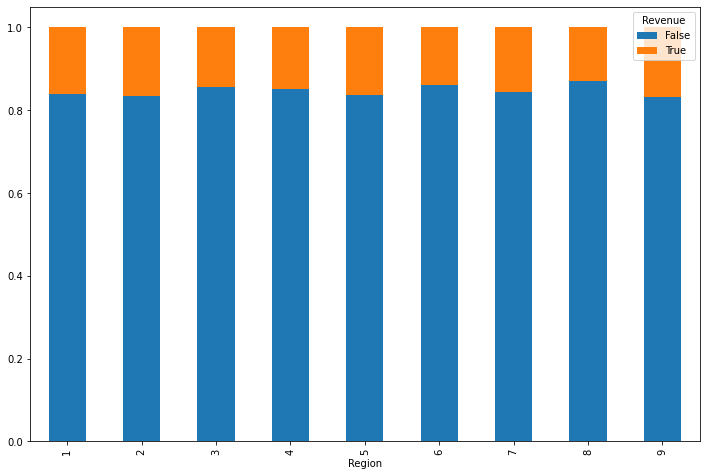

In [36]:
pd.crosstab(df2['Region'], df2['Revenue']).apply(lambda x: x/x.sum(), axis = 1).plot(kind = 'bar',  stacked = True, figsize = (12,8))

In [37]:
pd.crosstab(df2['Region'], df2['Revenue']).apply(lambda x: x/x.sum(), axis = 1)

Revenue,False,True
Region,,
1,0.838500,0.161500
2,0.834215,0.165785
3,0.854704,0.145296
4,0.851569,0.148431
5,0.835962,0.164038
6,0.860697,0.139303
7,0.843627,0.156373
8,0.870968,0.129032
9,0.831703,0.168297


Although the region 1 is the place with more visitors and more purchases, proportionally the visitors of region 9 buy more than them

# Preprocessing

In [39]:
## Let's transform string data into numbers
lb = LabelEncoder()
df2['Month'] = lb.fit_transform(df2['Month'])


In [40]:
df2['VisitorType'] = lb.fit_transform(df2['VisitorType'])

In [42]:
df2.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,2,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,2,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,False,False


In [43]:
df2.dropna(inplace=True)

In [44]:
df2.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,7,3,2,1,2,0,True,False


In [47]:
# Now we balance the target variable. 
from imblearn.over_sampling import SMOTE

In [48]:
seed = 10
# separating predictors and target:
X = df2.iloc[:,:-1]
Y = df2.iloc[:,-1:]

In [49]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [50]:
Y.head()

,Revenue
0,False
1,False
2,False
3,False
4,False


In [52]:
balancer = SMOTE(random_state = seed)
X_balanced, Y_balanced = balancer.fit_resample(X,Y)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


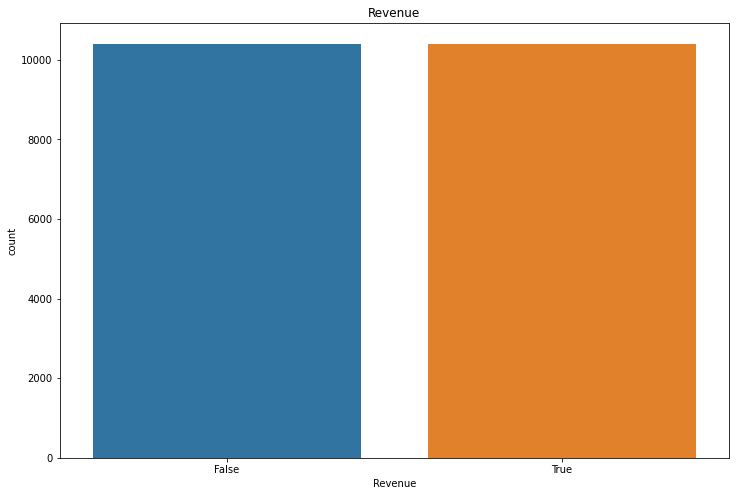

In [105]:
# checking if it worked
plt.figure(figsize=(12,8))
plt.title('Revenue')
sns.countplot(Y_balanced['Revenue'])
plt.savefig('04.png')

In [54]:
len(X_balanced)

20816

In [55]:
len(X)

12316

In [57]:
## Verifying null values:
X_balanced.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [58]:
Y_balanced.isnull().sum()

Revenue    0
dtype: int64

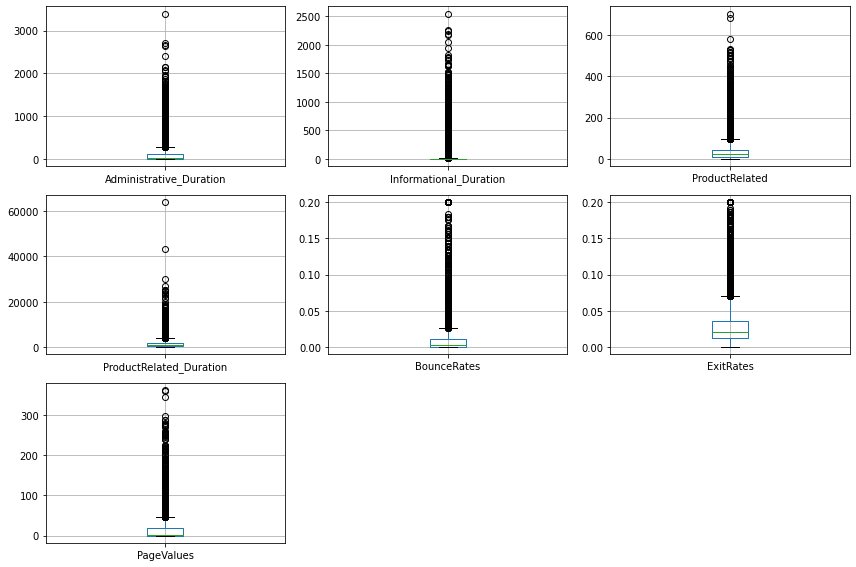

In [103]:
## Verifying outliers:
plt.figure(figsize=(12,8))
for i,col in enumerate(continuos):
    plt.subplot(3,3,i+1) # nrows, ncols, index
    X_balanced.boxplot(col)
    plt.tight_layout()
plt.savefig('01.png')

In [60]:
def replace_outliers(dataset):
    data = dataset.copy()
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    IQR = q3 - q1
    for i in range(0, len(data)):
        if data[i] < q1 - 1.5*IQR:
            data.iat[i] = np.mean(data)
        elif data[i] > q3 + 1.5*IQR:
            data.iat[i] = np.mean(data)
    return data
    

In [68]:
#df3 = X_balanced.copy()
for i in df3[continuos].columns:
    df3[i] = replace_outliers(df3[i])

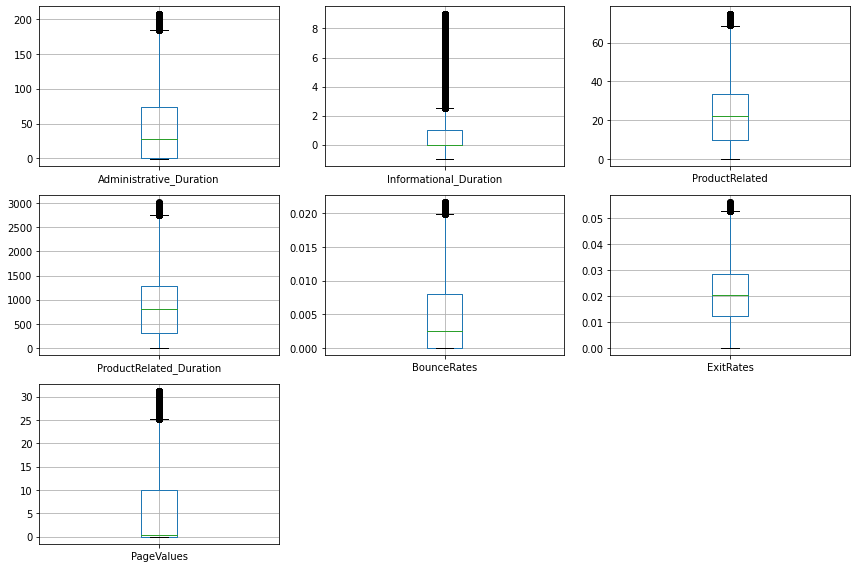

In [102]:
# verifying the replacement:
plt.figure(figsize=(12,8))
for i,col in enumerate(continuos):
    plt.subplot(3,3,i+1) # nrows, ncols, index
    df3.boxplot(col)
    plt.tight_layout()
plt.savefig('02.png')

In [74]:
# Split between test and train
X_train, X_test, Y_train, Y_test = train_test_split(df3,Y_balanced, test_size=0.3, random_state = seed)

# SVM Model

In [75]:
# Linear kernel
m1 = svm.SVC(kernel = 'linear')

In [76]:
m1.fit(X_train,Y_train)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [80]:
# Dictionary of metadata:
d_m1 = {'Model': 'SVM',
       'Version': 1,
       'Kernel': 'Linear',
       'Precision': precision_score(m1.predict(X_test),Y_test),
       'Recall': recall_score(m1.predict(X_test),Y_test),
       'F1 Score': f1_score(m1.predict(X_test),Y_test),
       'Accuracy': accuracy_score(m1.predict(X_test),Y_test),
       'AUC': roc_auc_score(Y_test, m1.predict(X_test))}

In [81]:
d_m1

{'Model': 'SVM',
 'Version': 1,
 'Kernel': 'Linear',
 'Precision': 0.8119383825417201,
 'Recall': 0.8803061934585943,
 'F1 Score': 0.8447412353923205,
 'Accuracy': 0.8510808646917534,
 'AUC': 0.8509995524086037}

In [90]:
## Normalizing the data to reduce the time of processing
Norm_X = MinMaxScaler()
Norm_Y = MinMaxScaler()
X_train_norm = Norm_X.fit_transform(X_train)
Y_train_norm = Norm_Y.fit_transform(Y_train)
X_test_norm = Norm_X.fit_transform(X_test)
Y_test_norm = Norm_Y.fit_transform(Y_test)

In [91]:
## version 2 of the model
m2 = svm.SVC(kernel = 'linear')
m2.fit(X_train_norm, Y_train_norm)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [96]:
## dictionary for m2:
d_m2 = {'Model': 'SVM',
       'Version': 2,
       'Kernel': 'Linear',
       'Precision': precision_score(m2.predict(X_test_norm),Y_test_norm),
       'Recall': recall_score(m2.predict(X_test_norm),Y_test_norm),
       'F1 Score': f1_score(m2.predict(X_test_norm),Y_test_norm),
       'Accuracy': accuracy_score(m2.predict(X_test_norm),Y_test_norm),
       'AUC': roc_auc_score(Y_test_norm, m2.predict(X_test_norm))}

In [97]:
d_m2

{'Model': 'SVM',
 'Version': 2,
 'Kernel': 'Linear',
 'Precision': 0.7994223363286265,
 'Recall': 0.8871082621082621,
 'F1 Score': 0.8409858203916274,
 'Accuracy': 0.8491593274619695,
 'AUC': 0.8490560067708969}

In [94]:
## Changing the kernel
m3 = svm.SVC(kernel = 'rbf')
## Hiperparameters of SVM for gridSearch

C_range = np.array([50,100,200])
gamma_range = np.array([0.3*0.001, 0.001,3*0.001])
svm_parameters_grid = dict(gamma = gamma_range, C = C_range)
m3_grid = GridSearchCV(m3,svm_parameters_grid, cv =3)


In [95]:
m3_grid.fit(X_train_norm, Y_train_norm)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([ 50, 100, 200]),
                         'gamma': array([0.0003, 0.001 , 0.003 ])})

In [99]:
d_m3 = {'Model': 'SVM',
       'Version': 2,
       'Kernel': 'rbf',
       'Precision': precision_score(m3_grid.predict(X_test_norm),Y_test_norm),
       'Recall': recall_score(m3_grid.predict(X_test_norm),Y_test_norm),
       'F1 Score': f1_score(m3_grid.predict(X_test_norm),Y_test_norm),
       'Accuracy': accuracy_score(m3_grid.predict(X_test_norm),Y_test_norm),
       'AUC': roc_auc_score(Y_test_norm, m3_grid.predict(X_test_norm))}

In [100]:
d_m3

{'Model': 'SVM',
 'Version': 2,
 'Kernel': 'rbf',
 'Precision': 0.8032734274711169,
 'Recall': 0.8882185947480482,
 'F1 Score': 0.8436130771823391,
 'Accuracy': 0.8514011208967174,
 'AUC': 0.8513011432657598}

In [101]:
m3_grid.best_params_

{'C': 200, 'gamma': 0.003}

In [106]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(Y_test_norm, m3_grid.predict(X_test_norm))
roc_auc = metrics.auc(fpr, tpr)

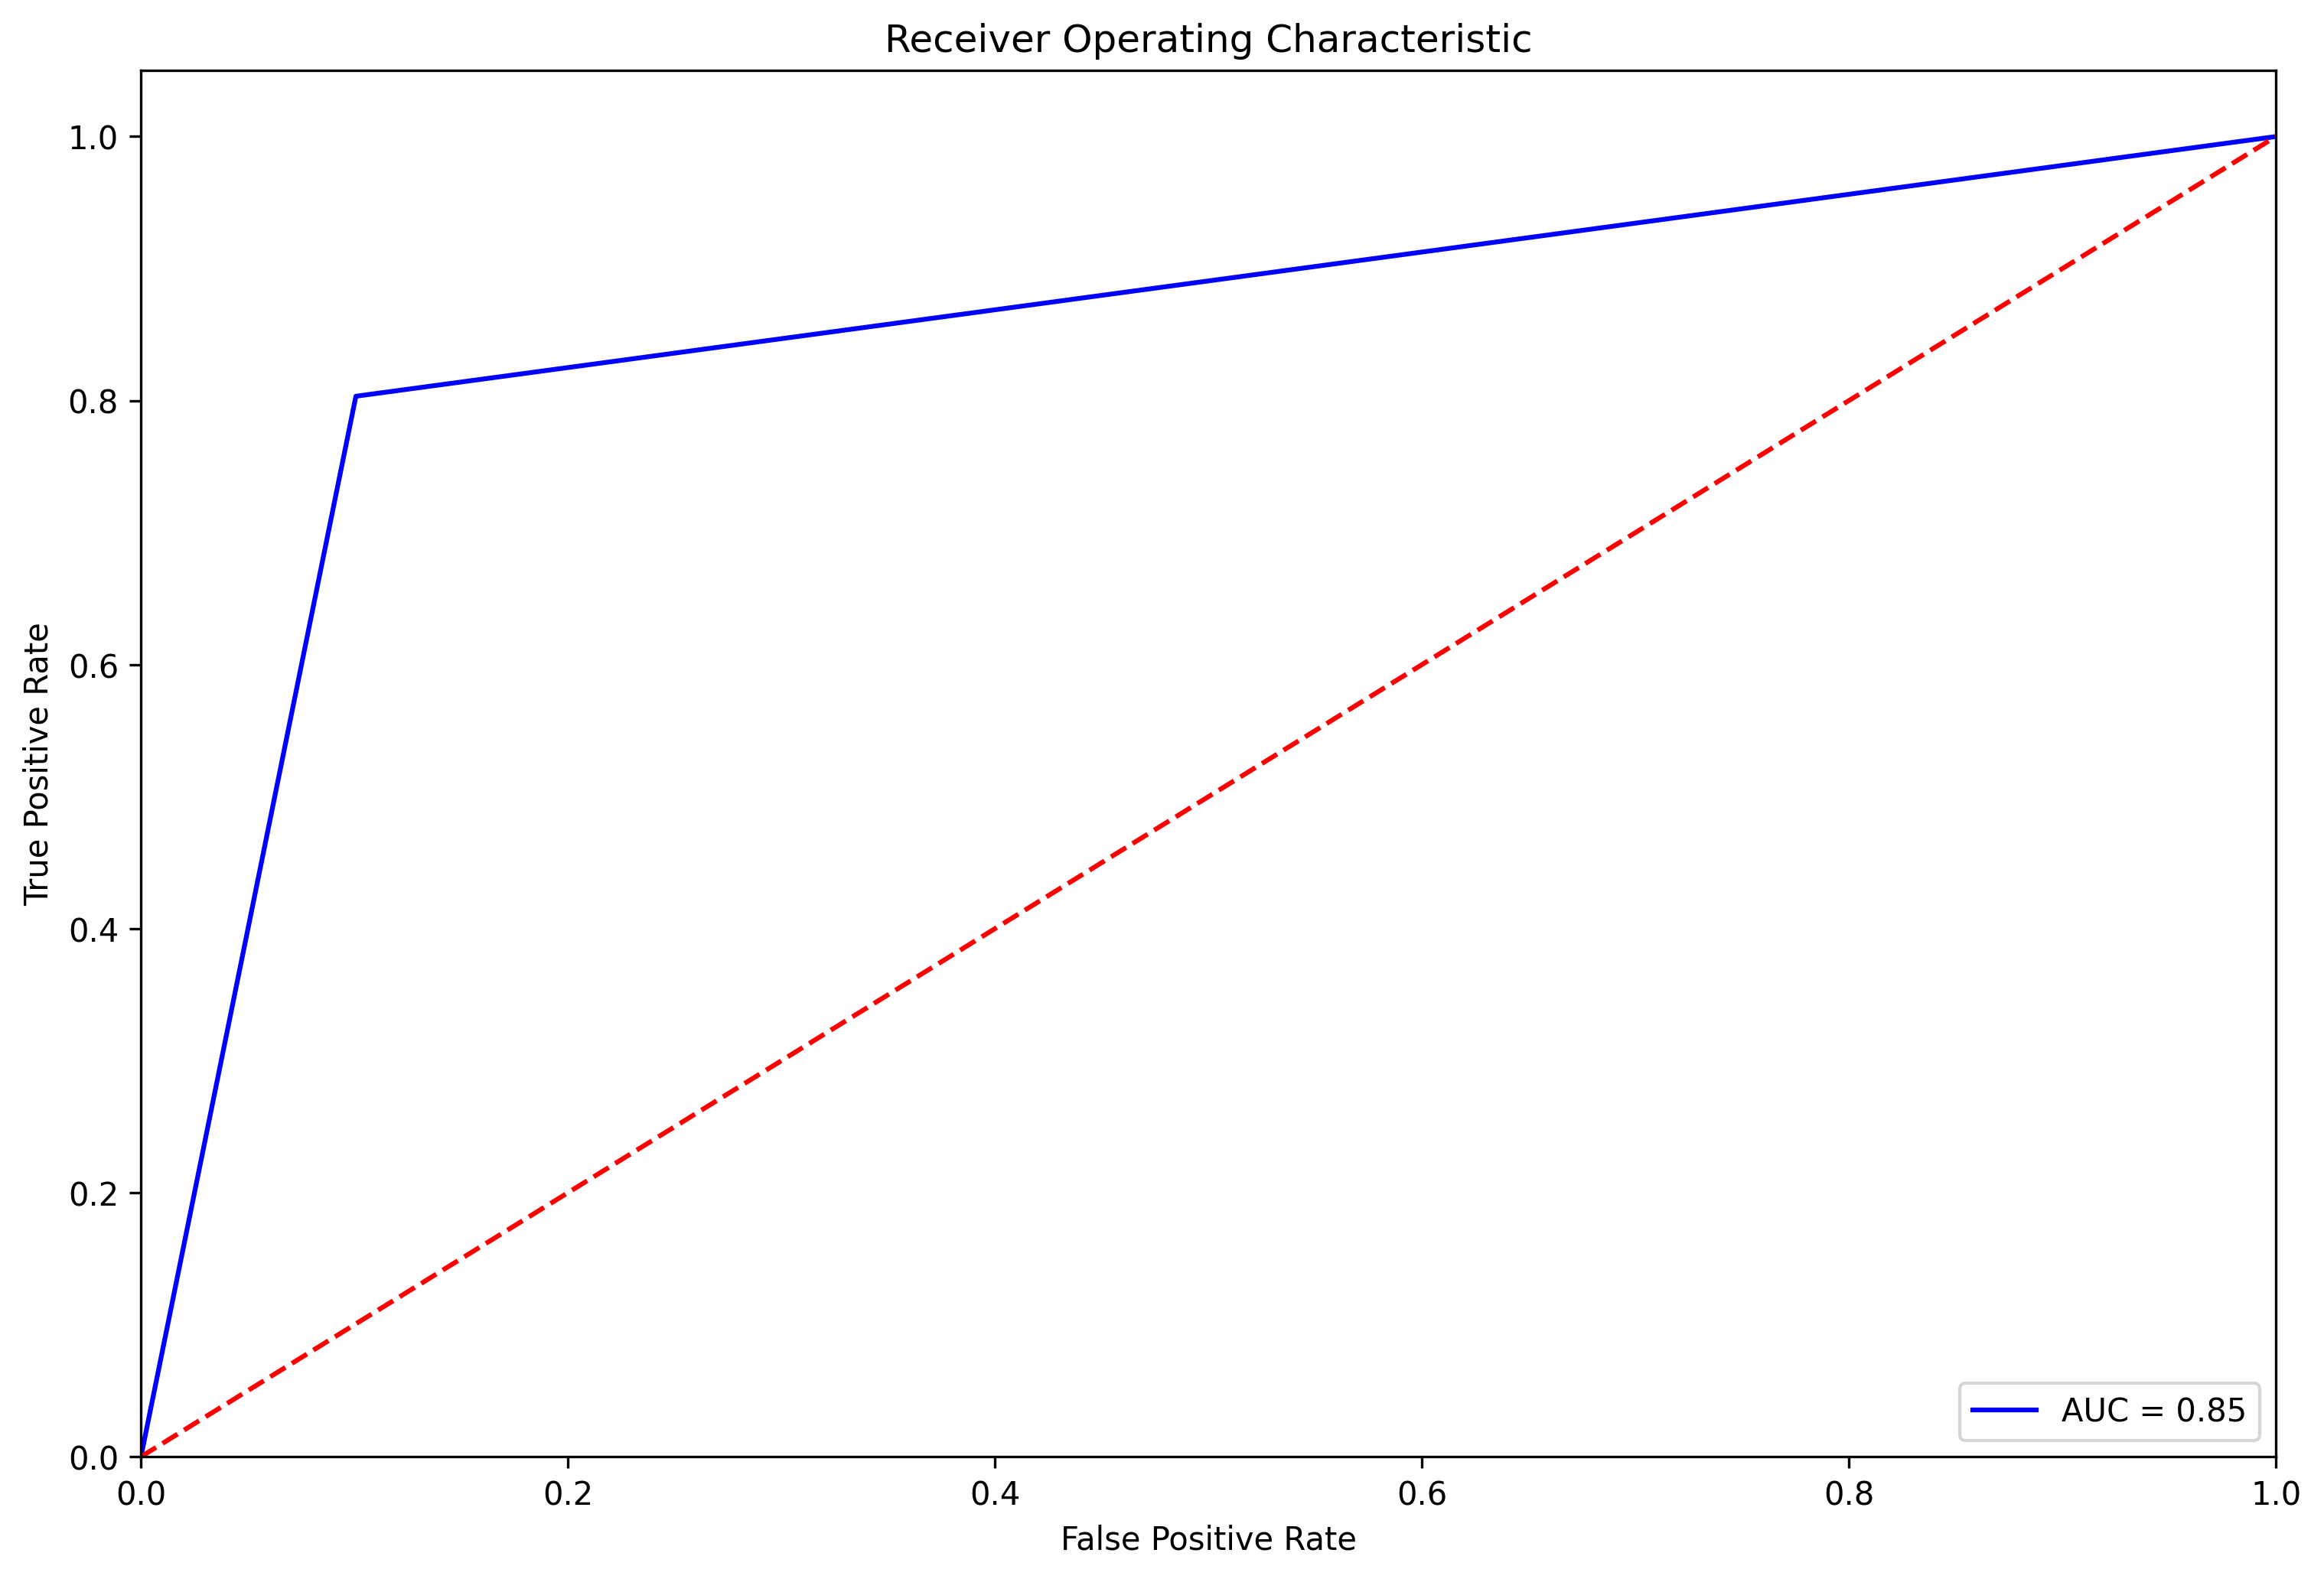

In [119]:
plt.figure(figsize=(12,8), dpi = 300)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('05.png')